In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings 
warnings.simplefilter('ignore')
import matplotlib 
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit
%matplotlib inline

In [58]:
df=pd.read_csv('../data/Sales_Data_electronics/Sales_April_2019.csv')

In [59]:
df_train,df_test=train_test_split(df,test_size=0.20,random_state=8)

In [60]:
df_train.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15228,191082,AA Batteries (4-pack),1,3.84,04/07/19 09:39,"889 12th St, New York City, NY 10001"
9702,185819,USB-C Charging Cable,1,11.95,04/09/19 17:18,"809 10th St, Boston, MA 02215"
10175,186271,Vareebadd Phone,1,400,04/07/19 20:29,"222 Church St, New York City, NY 10001"
17919,193651,27in FHD Monitor,1,149.99,04/15/19 19:38,"849 13th St, San Francisco, CA 94016"
16359,192165,AAA Batteries (4-pack),1,2.99,04/19/19 16:18,"524 Johnson St, San Francisco, CA 94016"


In [61]:
def cleaning_data(df):
    
    df=df.dropna()
    # cleaning column and seperate appropriate colums
    i = df[df['Quantity Ordered'] == 'Quantity Ordered'].index
    # here we look df['Quantity Ordered'].unique() we find  'Quantity Ordered' so it's noise (order id etc in row)
    df.drop(i, axis=0, inplace=True)
    
    #convert to object to int or float respectivly columns 
    df['Quantity Ordered']=df['Quantity Ordered'].astype(int) 
    df['Price Each']=df['Price Each'].astype(float) 
    
    # seperate columns time or date from orderdate
    df['Order Date']=df['Order Date'].str.split(' ')
    df['ord_date']=df['Order Date'].apply(lambda x : x[0]) # date 
    df['ord_time']=df['Order Date'].apply(lambda x : x[1]) # time
    df['ord_date_day']=df['ord_date'].str.split('/').apply(lambda x:int(x[1]))  #day
    
    df['ord_date_month']=df['ord_date'].str.split('/').apply(lambda x:int(x[0])) # month
    
    #time convert minute to hour 
    df['ord_time']=df['ord_time'].str.split(':').apply(lambda x :round(float(x[0])+float(x[1])/60,2))
    # now we seperate address columns
    df['Purchase Address']=df['Purchase Address'].str.split(',')
    df['area_in_city']=df['Purchase Address'].apply(lambda x :x[0]) # area and street
    df['city']=df['Purchase Address'].apply(lambda x: x[1])  #city
    df['state_zip']=df['Purchase Address'].apply(lambda x :x[2]) # stae_zip
    
    return df

In [62]:
df_test=cleaning_data(df_test)
df_train=cleaning_data(df_train)


In [70]:
df_train.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ord_date,ord_time,ord_date_day,ord_date_month,area_in_city,city,state_zip
15228,191082,AA Batteries (4-pack),1,3.84,"[04/07/19, 09:39]","[889 12th St, New York City, NY 10001]",04/07/19,9.65,7,4,889 12th St,New York City,NY 10001
9702,185819,USB-C Charging Cable,1,11.95,"[04/09/19, 17:18]","[809 10th St, Boston, MA 02215]",04/09/19,17.30,9,4,809 10th St,Boston,MA 02215
10175,186271,Vareebadd Phone,1,400.00,"[04/07/19, 20:29]","[222 Church St, New York City, NY 10001]",04/07/19,20.48,7,4,222 Church St,New York City,NY 10001
17919,193651,27in FHD Monitor,1,149.99,"[04/15/19, 19:38]","[849 13th St, San Francisco, CA 94016]",04/15/19,19.63,15,4,849 13th St,San Francisco,CA 94016
16359,192165,AAA Batteries (4-pack),1,2.99,"[04/19/19, 16:18]","[524 Johnson St, San Francisco, CA 94016]",04/19/19,16.30,19,4,524 Johnson St,San Francisco,CA 94016


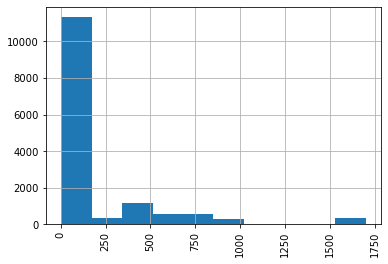

In [63]:
df_train['Price Each'].hist()
plt.xticks(rotation=90)
plt.show()

In [64]:
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [71]:
df_train['city'].progress_map(lambda x: x.count('New York City'))

15228    1
9702     0
10175    1
17919    0
16359    0
        ..
5480     1
6995     0
10376    0
2181     0
4547     1
Name: city, Length: 14628, dtype: int64

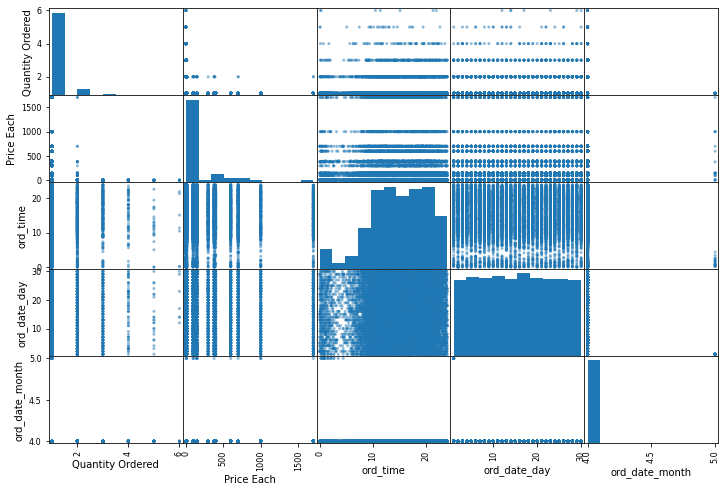

In [74]:
pd.plotting.scatter_matrix(df_train, figsize=(12,8))
plt.show()

In [8]:
from ipywidgets import interact

In [9]:
l1=[13,34,56,78]
l2=l1

In [13]:
@interact(n=(0, len(l1)-1))
def display_faces(n=0):
    print(n)

interactive(children=(IntSlider(value=0, description='n', max=3), Output()), _dom_classes=('widget-interact',)…